In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_samples= 100 , n_features =2,n_informative=1 ,n_redundant=0,n_classes = 2,n_clusters_per_class = 1, random_state = 41,hypercube=False,class_sep=10)

In [3]:
X ,y

(array([[ 0.19924745, -0.11697552],
        [-0.24882029, -0.73115232],
        [-0.3544904 , -0.7081059 ],
        [-1.59086506, -2.01199214],
        [-0.20083951,  1.63493163],
        [-0.83241122,  0.15599044],
        [-1.79207014,  1.07782053],
        [ 0.0856607 ,  0.80626713],
        [-0.55865299,  0.74859527],
        [-1.95974262,  0.75152794],
        [-1.77828947, -0.90114581],
        [-1.77985853, -0.1815243 ],
        [-0.02194151, -2.98092432],
        [ 0.80563431,  1.20500136],
        [-1.82701214,  0.78302407],
        [ 0.38730728,  0.42968688],
        [-0.14108668, -0.73229726],
        [-1.87955941, -0.83930476],
        [-0.18232911,  0.83727062],
        [-1.77059533, -0.10255323],
        [-2.27658028,  0.65867001],
        [-2.06519502,  0.92649819],
        [-1.31690551,  0.10216193],
        [ 1.61043259,  0.46886454],
        [-1.21650394,  0.45432938],
        [ 0.6139723 ,  1.8613386 ],
        [-1.78760957, -0.79255991],
        [-1.04149161, -1.000

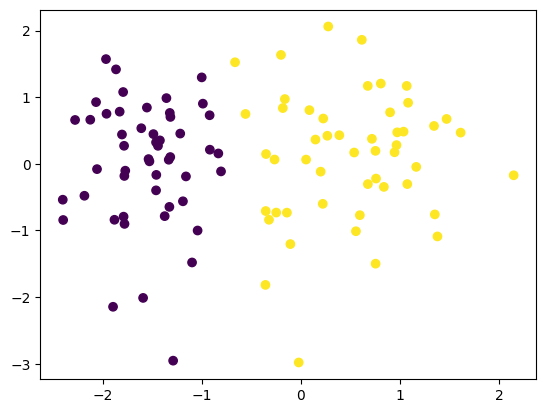

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
X.shape

(100, 2)

# Step

In [6]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)    # (data , col index ,value inserted )
    weights = np.ones(X.shape[1]) #initialising weights to one
    lr = 0.01
        
    for i in range(1000): #epochs
        j = np.random.randint(0,100) #eandom datapoint select
        y_hat = step(np.dot(X[j],weights)) #step activation
        weights = weights + lr *(y[j]-y_hat)*X[j]

    return weights[0] , weights[1:]

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
np.dot(np.insert(X[41],0,1),[1,1,1])

np.float64(0.2946000908036749)

In [9]:
intercept_ ,coef_  = perceptron(X,y)
intercept_ , coef_

(np.float64(0.9199999999999999), array([1.29738131, 0.26168857]))

In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100) #tp create the line /classifier
y_input = m*x_input + b

(-3.0, 2.0)

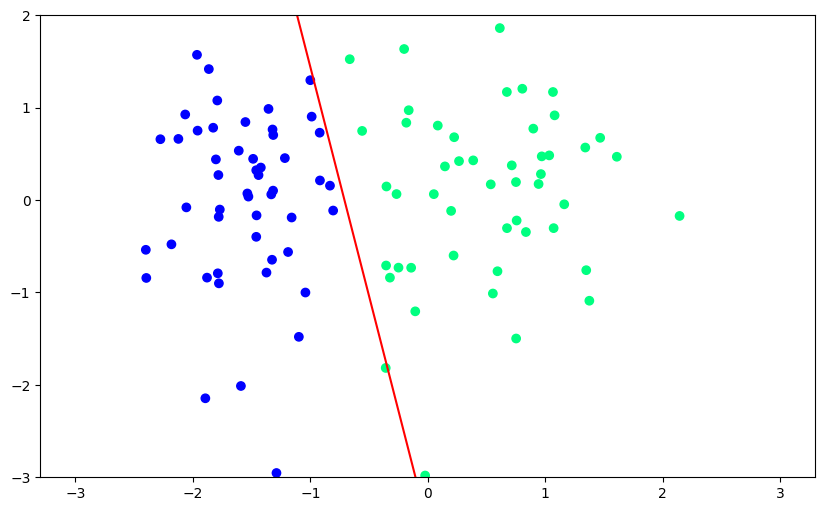

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

In [13]:
#comparision with sklearn
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [14]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

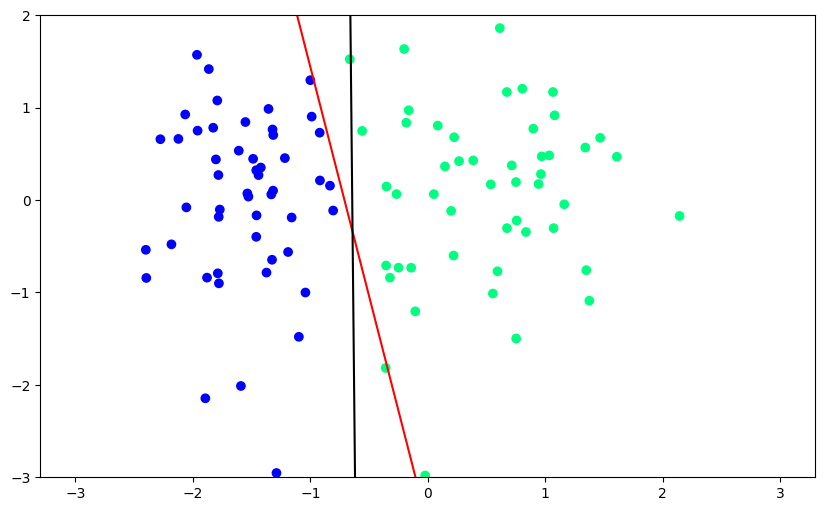

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red')
plt.plot(x_input1,y_input1,color='black')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

Perceptron trick just tries to find a line that seperates both for the given data , it  is not generalised , hence it overfits , and training loss < testing loss , generally 

In [17]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [18]:
m,b = perceptron(X,y)

In [19]:
%matplotlib inline
from matplotlib.animation import FuncAnimation ,PillowWriter
import matplotlib.animation as animation

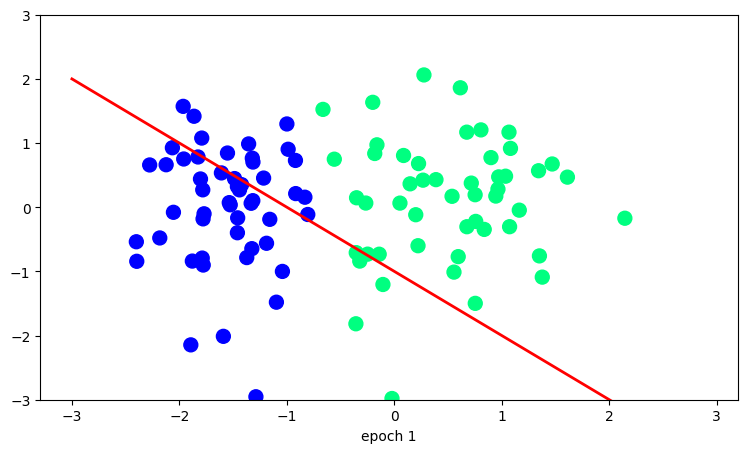

In [20]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
writer = PillowWriter(fps=10)
anim.save("perceptron_training.gif", writer=writer)

# Sigmoid

In [21]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
intercept_,coef_ = perceptron(X,y)

In [24]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [25]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

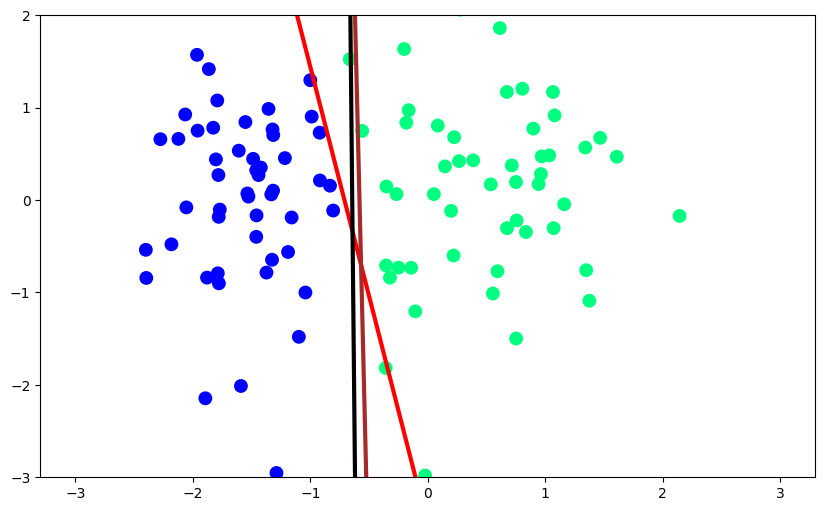

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=80)
plt.ylim(-3,2)

In [27]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [28]:
m,b = perceptron(X,y)

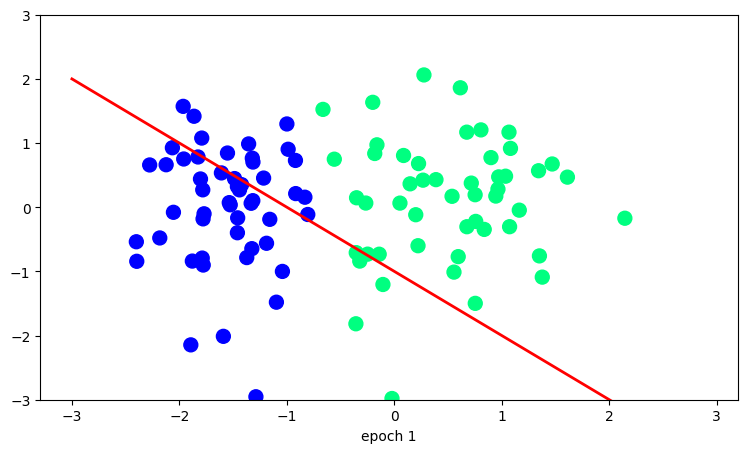

In [29]:
%matplotlib inline
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
writer = PillowWriter(fps=10)
anim.save("perceptron_training_sigmoid.gif", writer=writer)